# MNIST Autoencoder

### Building an autoencoder
Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels (28 x 28). The autoencoder will essentially learn to turn the 784 pixels original image into a compressed 32 pixels image and learn how to use that encoded representation to bring back the original 784 pixels image.

In [10]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test_noise = np.load('MNIST/X_test_MNIST_noise.npy')
X_test_noise = X_test_noise.reshape((len(X_test_noise), np.prod(X_test.shape[1:])))
y_test_noise = np.load('MNIST/y_test_MNIST.npy')

In [19]:
# Start with a sequential model
autoencoder = keras.Sequential()

# Add a dense layer with input the original image pixels and neurons the encoded representation
autoencoder.add(keras.layers.Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many neurons as the orginal image pixels
autoencoder.add(keras.layers.Dense(784, activation = "sigmoid"))

# Compile your model with adadelta
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# Summarize your model structure
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### De-noising with an autoencoder
You have just built an `autoencoder` model, let's now see how it handles a more challenging task.

First, you will build a model that encodes images, and you will check how different digits are represented with `show_encodings()`. To build the encoder you will make use of your autoencoder, that has already being trained. You will just use the first half of the network, which contains the input and the bottleneck output. That way, you will obtain a 32 number output which represents the encoded version of the input image.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

The digits in this noisy dataset look like this:

<img src='MNIST/noisy_nums.png' width="800" height="400" align="center"/>

In [20]:
def show_encodings(encoded_imgs,number=1):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test_noise == number)]
    encoded_imgs = encoded_imgs[np.where(y_test_noise == number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [21]:
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')

In [22]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test), verbose=0)

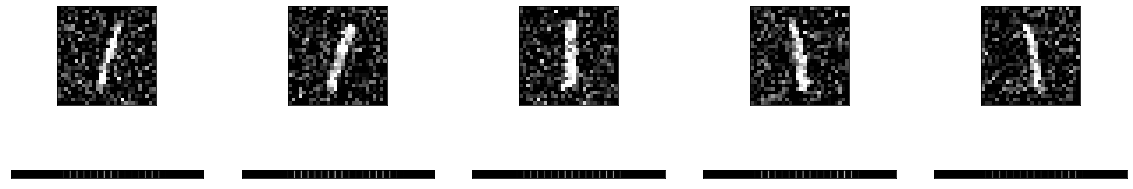

In [23]:
# Build your encoder by using the first layer of your autoencoder
encoder = keras.Sequential()
encoder.add(autoencoder.layers[0])

# Encode the noisy images and show the encodings for your favorite number [0-9]
encodings = autoencoder.predict(X_test_noise)
show_encodings(encodings, number = 1)

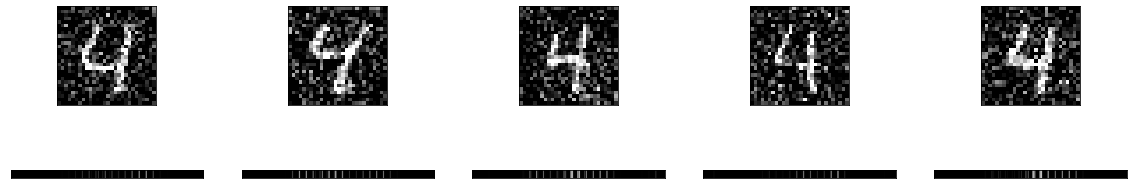

In [24]:
show_encodings(encodings, number = 4)

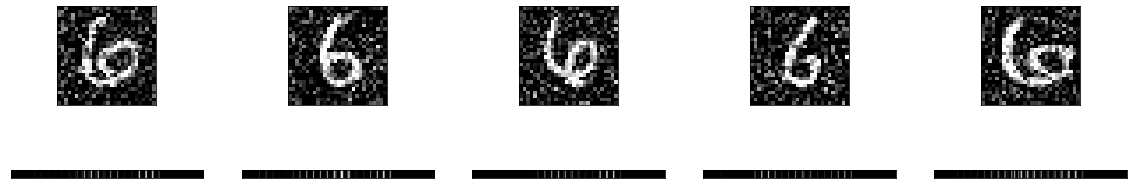

In [25]:
show_encodings(encodings, number = 6)

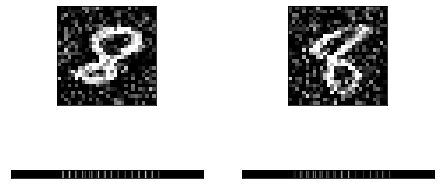

In [26]:
show_encodings(encodings, number = 8)

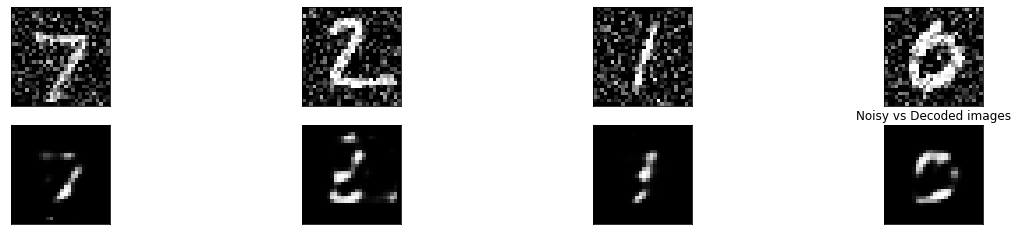

In [27]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

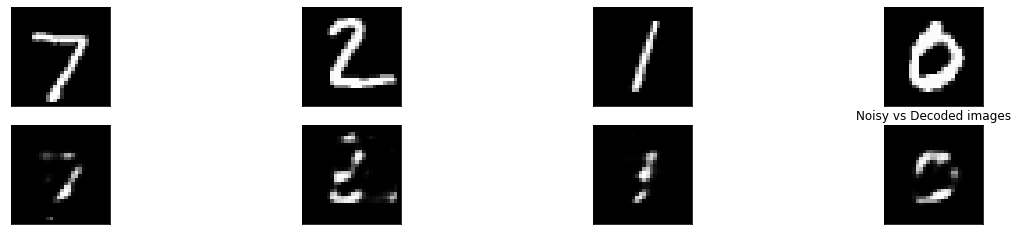

In [28]:
# Plot noisy vs decoded images
compare_plot(X_test, decoded_imgs)